# Preparación de los datos

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# Expand nested columns
customer_expanded = df['customer'].apply(pd.Series)
phone_expanded = df['phone'].apply(pd.Series)
internet_expanded = df['internet'].apply(pd.Series)
account_expanded = df['account'].apply(pd.Series)

# Rename columns to avoid conflicts and indicate origin
customer_expanded.columns = ['customer_' + col for col in customer_expanded.columns]
phone_expanded.columns = ['phone_' + col for col in phone_expanded.columns]
internet_expanded.columns = ['internet_' + col for col in internet_expanded.columns]
account_expanded.columns = ['account_' + col for col in account_expanded.columns]

# Concatenate the expanded dataframes with the original dataframe (excluding the original nested columns)
df_expanded = pd.concat([df[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded], axis=1)

display(df_expanded.head())

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [5]:
# Expand the 'account_Charges' column
charges_expanded = df_expanded['account_Charges'].apply(pd.Series)

# Rename charges columns
charges_expanded.columns = ['account_Charges_' + col for col in charges_expanded.columns]

# Convert charges columns to numeric, coercing errors
charges_expanded['account_Charges_Monthly'] = pd.to_numeric(charges_expanded['account_Charges_Monthly'], errors='coerce')
charges_expanded['account_Charges_Total'] = pd.to_numeric(charges_expanded['account_Charges_Total'], errors='coerce')


# Concatenate the expanded charges dataframe with the main dataframe (excluding the original account_Charges column)
df_expanded = pd.concat([df_expanded.drop(columns=['account_Charges']), charges_expanded], axis=1)

display(df_expanded.head())

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [6]:
# Save the cleaned DataFrame to a CSV file
df_expanded.to_csv('telecom_data_cleaned.csv', index=False)

print("Datos guardados en 'telecom_data_cleaned.csv'")

Datos guardados en 'telecom_data_cleaned.csv'


In [7]:
# Remove irrelevant columns
df_expanded = df_expanded.drop(columns=['customerID'])

display(df_expanded.head())

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [8]:
# Identify categorical columns
categorical_cols = df_expanded.select_dtypes(include='object').columns.tolist()

# Exclude the target variable 'Churn' from encoding
categorical_cols.remove('Churn')

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_expanded, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Churn,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,No,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [9]:
# Calculate the proportion of churned customers
churn_counts = df_encoded['Churn'].value_counts()
churn_proportion = df_encoded['Churn'].value_counts(normalize=True)

print("Conteo de clientes por Churn:")
print(churn_counts)
print("\nProporción de clientes por Churn:")
print(churn_proportion)

Conteo de clientes por Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Proporción de clientes por Churn:
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


In [10]:
# Remove rows where 'Churn' is an empty string
df_encoded = df_encoded[df_encoded['Churn'] != '']

# Verify the changes
print("Conteo de clientes por Churn después de eliminar filas vacías:")
print(df_encoded['Churn'].value_counts())
print("\nProporción de clientes por Churn después de eliminar filas vacías:")
print(df_encoded['Churn'].value_counts(normalize=True))

Conteo de clientes por Churn después de eliminar filas vacías:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clientes por Churn después de eliminar filas vacías:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [11]:
!pip install imblearn

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Convert target variable to numeric (0 for No, 1 for Yes) for SMOTE
y = y.map({'No': 0, 'Yes': 1})

# Drop rows with NaN values in X
X = X.dropna()
y = y[X.index] # Align y with the filtered X

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Distribución de clases después de SMOTE:")
print(Counter(y_resampled))

Distribución de clases después de SMOTE:
Counter({0: 5163, 1: 5163})


# Correlación y Selección de Variables

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the resampled features (X_resampled)
X_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled features back to a DataFrame (optional, but good for inspection)
X_scaled = pd.DataFrame(X_scaled, columns=X_resampled.columns)

display(X_scaled.head())

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,-0.396364,-0.779481,-0.085108,-0.665747,-1.167214,0.998452,1.531692,0.296804,-0.338226,-0.963853,...,-0.449395,1.114605,-0.449395,-0.898234,2.044782,-0.464261,0.664814,-0.527229,-0.961798,1.798733
1,-0.396364,-0.779481,-0.283703,-0.689020,0.856741,-1.001551,-0.652873,0.296804,-0.338226,1.037503,...,-0.449395,-0.897178,-0.449395,1.113296,-0.489050,-0.464261,-1.504181,-0.527229,-0.961798,1.798733
2,-0.396364,-0.988023,0.204074,-0.808604,0.856741,-1.001551,-0.652873,0.296804,-0.338226,-0.963853,...,-0.449395,-0.897178,-0.449395,-0.898234,-0.489050,-0.464261,0.664814,-0.527229,1.039719,-0.555947
3,2.522933,-0.612646,1.043748,-0.371049,0.856741,0.998452,-0.652873,0.296804,-0.338226,-0.963853,...,-0.449395,1.114605,-0.449395,1.113296,-0.489050,-0.464261,0.664814,-0.527229,1.039719,-0.555947
4,2.522933,-1.029732,0.552486,-0.814754,-1.167214,0.998452,-0.652873,0.296804,-0.338226,-0.963853,...,-0.449395,1.114605,-0.449395,-0.898234,-0.489050,-0.464261,0.664814,-0.527229,-0.961798,1.798733


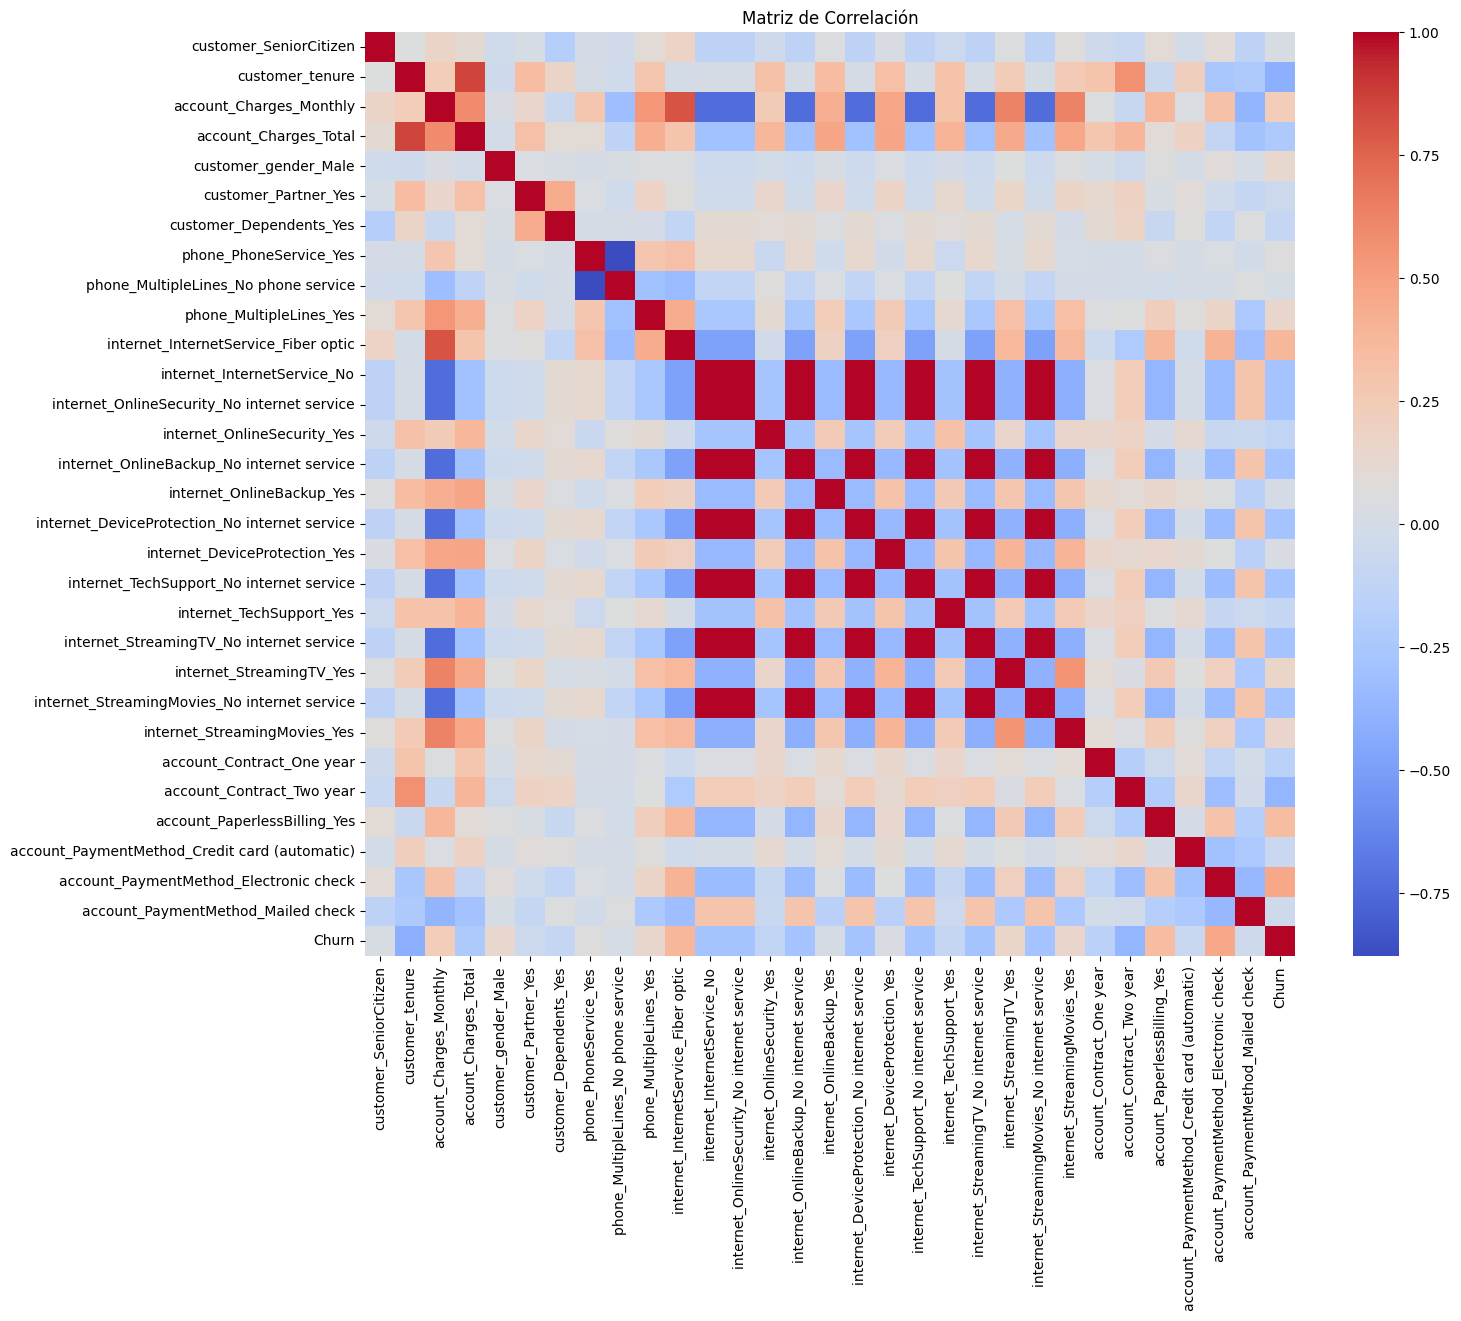

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the target variable back to the scaled features for correlation analysis
df_scaled = X_scaled.copy()
df_scaled['Churn'] = y_resampled

# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Modelado Predictivo

In [16]:
# Define a correlation threshold
correlation_threshold = 0.2

# Get the absolute correlation of features with Churn
churn_correlation = correlation_matrix['Churn'].abs().sort_values(ascending=False)

# Select features with correlation above the threshold (excluding Churn itself)
relevant_features = churn_correlation[churn_correlation > correlation_threshold].index.tolist()
relevant_features.remove('Churn')

# Create a new DataFrame with selected features and the target variable
X_selected = X_scaled[relevant_features]
y_selected = df_scaled['Churn']


print(f"Variables seleccionadas (correlación absoluta > {correlation_threshold}):")
print(relevant_features)

display(X_selected.head())

Variables seleccionadas (correlación absoluta > 0.2):
['account_PaymentMethod_Electronic check', 'customer_tenure', 'internet_InternetService_Fiber optic', 'account_Contract_Two year', 'account_PaperlessBilling_Yes', 'internet_OnlineBackup_No internet service', 'internet_StreamingTV_No internet service', 'internet_StreamingMovies_No internet service', 'internet_TechSupport_No internet service', 'internet_DeviceProtection_No internet service', 'internet_InternetService_No', 'internet_OnlineSecurity_No internet service', 'account_Charges_Monthly', 'account_Charges_Total']


,account_PaymentMethod_Electronic check,customer_tenure,internet_InternetService_Fiber optic,account_Contract_Two year,account_PaperlessBilling_Yes,internet_OnlineBackup_No internet service,internet_StreamingTV_No internet service,internet_StreamingMovies_No internet service,internet_TechSupport_No internet service,internet_DeviceProtection_No internet service,internet_InternetService_No,internet_OnlineSecurity_No internet service,account_Charges_Monthly,account_Charges_Total
0,-0.961798,-0.779481,-1.076311,-0.464261,0.664814,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.085108,-0.665747
1,-0.961798,-0.779481,-1.076311,-0.464261,-1.504181,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.283703,-0.689020
2,1.039719,-0.988023,0.929100,-0.464261,0.664814,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,0.204074,-0.808604
3,1.039719,-0.612646,0.929100,-0.464261,0.664814,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,1.043748,-0.371049
4,-0.961798,-1.029732,0.929100,-0.464261,0.664814,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,-0.449395,0.552486,-0.814754


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected)

print("Dimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Dimensiones del conjunto de entrenamiento:
X_train: (8260, 14)
y_train: (8260,)

Dimensiones del conjunto de prueba:
X_test: (2066, 14)
y_test: (2066,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models
log_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Modelos entrenados:")
print("Regresión Logística: entrenado")
print("Árbol de Decisión: entrenado")
print("Random Forest: entrenado")

Modelos entrenados:
Regresión Logística: entrenado
Árbol de Decisión: entrenado
Random Forest: entrenado


--- Evaluación del Modelo: Regresión Logística ---
Exactitud (Accuracy): 0.7832
Precisión (Precision): 0.7701
Recall: 0.8074
F1-score: 0.7883


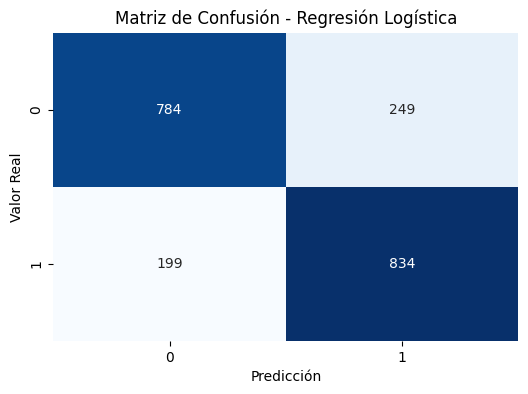

-----------------------------------------------
--- Evaluación del Modelo: Árbol de Decisión ---
Exactitud (Accuracy): 0.7696
Precisión (Precision): 0.7562
Recall: 0.7957
F1-score: 0.7755


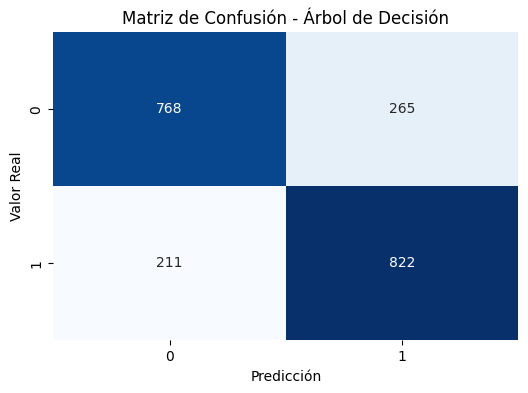

---------------------------------------------
--- Evaluación del Modelo: Random Forest ---
Exactitud (Accuracy): 0.8054
Precisión (Precision): 0.7974
Recall: 0.8190
F1-score: 0.8080


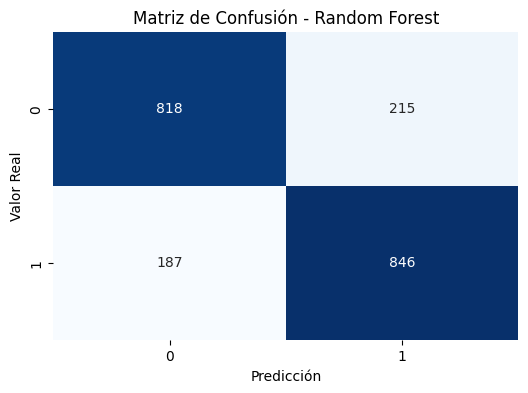

-----------------------------------------


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate a model and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"--- Evaluación del Modelo: {model_name} ---")
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()
    print("-" * (len(model_name) + 28)) # Separator line

# Evaluate each model
evaluate_model(log_reg_model, X_test, y_test, "Regresión Logística")
evaluate_model(decision_tree_model, X_test, y_test, "Árbol de Decisión")
evaluate_model(random_forest_model, X_test, y_test, "Random Forest")

# Interpretación y Conclusiones

### Análisis Crítico y Comparación de Modelos

Se entrenaron y evaluaron tres modelos para predecir la cancelación de clientes: Regresión Logística, Árbol de Decisión y Random Forest.

**Métricas de Evaluación en el Conjunto de Prueba:**

| Modelo              | Exactitud | Precisión | Recall  | F1-score |
| :------------------ | :-------- | :-------- | :------ | :------- |
| Regresión Logística | 0.7832    | 0.7701    | 0.8074  | 0.7883   |
| Árbol de Decisión   | 0.7696    | 0.7562    | 0.7957  | 0.7755   |
| Random Forest       | 0.8054    | 0.7974    | 0.8190  | 0.8080   |

**Análisis de Desempeño:**

-   **Regresión Logística:** Presenta un buen balance entre precisión y recall, indicando una capacidad razonable para identificar clientes que cancelarán y que las predicciones positivas son relativamente fiables.
-   **Árbol de Decisión:** Tuvo el desempeño más bajo de los tres modelos en todas las métricas evaluadas.
-   **Random Forest:** Demostró ser el modelo con el mejor rendimiento general, superando a los otros dos en exactitud, precisión, recall y F1-score. Esto sugiere que es el modelo más adecuado para este problema de clasificación.

**Posible Overfitting o Underfitting:**

-   Para confirmar formalmente el overfitting, sería necesario comparar el rendimiento en los conjuntos de entrenamiento y prueba. Sin embargo, es conocido que los **Árboles de Decisión** simples tienden a sobreajustar los datos de entrenamiento si no se controlan su complejidad (por ejemplo, limitando la profundidad).
-   El **Random Forest**, al ser un método de ensamble, inherentemente reduce el riesgo de overfitting en comparación con un único Árbol de Decisión. Su buen desempeño en el conjunto de prueba sugiere que no hay un overfitting severo.
-   La **Regresión Logística**, al ser un modelo lineal, podría presentar underfitting en problemas no lineales. Su rendimiento aquí es aceptable, lo que sugiere que las relaciones en los datos son, al menos en parte, linealmente separables o que las variables seleccionadas capturan bien la señal.

**Conclusión:**

Basado en las métricas de evaluación, el modelo de **Random Forest** es el que tuvo el mejor desempeño predictivo para identificar la cancelación de clientes en este conjunto de datos. Aunque no se realizó una validación cruzada o ajuste de hiperparámetros en esta etapa, el Random Forest es el punto de partida más prometedor para optimizaciones futuras.

In [20]:
# --- Regresión Logística ---
print("--- Importancia de Variables (Regresión Logística - Coeficientes) ---")
# Get the coefficients and pair them with feature names
feature_importance_lr = pd.Series(log_reg_model.coef_[0], index=X_train.columns)
# Sort by absolute value of coefficients
feature_importance_lr = feature_importance_lr.abs().sort_values(ascending=False)
print(feature_importance_lr)
print("-" * 60)


# --- Árbol de Decisión ---
print("\n--- Importancia de Variables (Árbol de Decisión) ---")
# Get feature importances and pair them with feature names
feature_importance_dt = pd.Series(decision_tree_model.feature_importances_, index=X_train.columns)
# Sort by importance score
feature_importance_dt = feature_importance_dt.sort_values(ascending=False)
print(feature_importance_dt)
print("-" * 60)


# --- Random Forest ---
print("\n--- Importancia de Variables (Random Forest) ---")
# Get feature importances and pair them with feature names
feature_importance_rf = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
# Sort by importance score
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)
print(feature_importance_rf)
print("-" * 60)

--- Importancia de Variables (Regresión Logística - Coeficientes) ---
customer_tenure                                  1.942814
account_Charges_Total                            1.146370
internet_InternetService_Fiber optic             0.785963
account_Charges_Monthly                          0.638175
account_PaymentMethod_Electronic check           0.585076
account_PaperlessBilling_Yes                     0.452213
account_Contract_Two year                        0.202981
internet_OnlineBackup_No internet service        0.048056
internet_StreamingTV_No internet service         0.048056
internet_StreamingMovies_No internet service     0.048056
internet_DeviceProtection_No internet service    0.048056
internet_TechSupport_No internet service         0.048056
internet_OnlineSecurity_No internet service      0.048056
internet_InternetService_No                      0.048056
dtype: float64
------------------------------------------------------------

--- Importancia de Variables (Árbol de De

### Análisis de la Importancia de las Variables e Interpretación

Hemos analizado la importancia de las variables para cada uno de los modelos entrenados (Regresión Logística, Árbol de Decisión y Random Forest) para identificar qué características influyen más en la predicción de la cancelación.

**Regresión Logística (basada en el valor absoluto de los coeficientes):**
Las variables más importantes en la Regresión Logística, en orden descendente de importancia, son:
- `customer_tenure`
- `account_Charges_Total`
- `internet_InternetService_Fiber optic`
- `account_Charges_Monthly`
- `account_PaymentMethod_Electronic check`
- `account_PaperlessBilling_Yes`
- `account_Contract_Two year`
*(y otras con menor peso)*

**Árbol de Decisión (basada en la impureza reducida):**
Las variables más importantes en el Árbol de Decisión, en orden descendente de importancia, son:
- `account_Charges_Total`
- `account_Charges_Monthly`
- `account_PaymentMethod_Electronic check`
- `customer_tenure`
- `internet_InternetService_Fiber optic`
- `account_PaperlessBilling_Yes`
*(y otras con menor importancia)*

**Random Forest (basada en la impureza promedio reducida):**
Las variables más importantes en el Random Forest, en orden descendente de importancia, son:
- `account_Charges_Total`
- `account_Charges_Monthly`
- `customer_tenure`
- `account_PaymentMethod_Electronic check`
- `internet_InternetService_Fiber optic`
- `account_PaperlessBilling_Yes`
- `account_Contract_Two year`
*(y otras con menor importancia)*

**Interpretación y Conclusiones Clave:**

Existe una fuerte consistencia entre los modelos, especialmente entre el Árbol de Decisión y el Random Forest, en identificar las variables más relevantes para predecir la cancelación. Las variables que consistentemente aparecen como las más importantes son:

-   **`account_Charges_Total` y `account_Charges_Monthly`:** Los cargos totales y mensuales de los clientes son predictores muy fuertes de la cancelación. Clientes con cargos más altos son más propensos a irse.
-   **`customer_tenure`:** La antigüedad del cliente es una variable crucial. Clientes con menor antigüedad tienden a cancelar con mayor frecuencia, mientras que los clientes a largo plazo son más leales.
-   **`account_PaymentMethod_Electronic check`:** Los clientes que pagan con cheque electrónico muestran una alta importancia en la predicción de cancelación, sugiriendo que este método de pago podría estar asociado con clientes más propensos a la cancelación.
-   **`internet_InternetService_Fiber optic`:** Tener servicio de fibra óptica también es una variable importante, indicando que los clientes con este servicio podrían tener razones específicas para cancelar.
-   **`account_PaperlessBilling_Yes`:** La facturación electrónica se asocia con una mayor probabilidad de cancelación.
-   **`account_Contract_Two year`:** Tener un contrato de dos años es un fuerte indicador de que el cliente *no* cancelará, lo cual es consistente con la naturaleza de un contrato a largo plazo.

**En resumen:** Los modelos sugieren que los factores económicos (cargos), el compromiso del cliente (antigüedad y tipo de contrato), el tipo de servicio de internet (fibra óptica) y el método de pago son los principales impulsores de la cancelación de clientes en este conjunto de datos. Esta información es valiosa para enfocar estrategias de retención en segmentos de clientes con estas características de riesgo.

### Informe Detallado: Factores Clave que Influyen en la Cancelación de Clientes y Estrategias de Retención

Basado en el análisis exploratorio de datos, la selección de variables y la evaluación de los modelos predictivos (Regresión Logística, Árbol de Decisión y Random Forest), hemos identificado los factores que más influyen en la cancelación de clientes en este conjunto de datos.

**Principales Factores que Afectan la Cancelación:**

Los modelos predictivos, particularmente el Random Forest que demostró el mejor rendimiento general, consistentemente señalaron las siguientes variables como las más relevantes para predecir la cancelación:

1.  **Cargos Totales y Mensuales (`account_Charges_Total`, `account_Charges_Monthly`):** Existe una fuerte correlación positiva entre los cargos que pagan los clientes y la probabilidad de cancelación. Clientes con facturas más altas son significativamente más propensos a cancelar el servicio. Esto podría indicar insatisfacción con la relación costo-beneficio o problemas de asequibilidad.

2.  **Antigüedad del Cliente (`customer_tenure`):** La antigüedad del cliente tiene una correlación negativa significativa con la cancelación. Los clientes que han estado con la empresa por un período más corto son más propensos a cancelar, mientras que los clientes a largo plazo muestran mayor lealtad. Esto subraya la importancia de la retención temprana de nuevos clientes.

3.  **Método de Pago (Principalmente `account_PaymentMethod_Electronic check`):** El uso del cheque electrónico como método de pago se asocia fuertemente con una mayor probabilidad de cancelación. Esto podría estar relacionado con un segmento de clientes que prefiere este método y que, por alguna razón, es más volátil o tiene experiencias negativas asociadas a él.

4.  **Tipo de Servicio de Internet (`internet_InternetService_Fiber optic`):** Los clientes con servicio de fibra óptica muestran una mayor propensión a cancelar en comparación con otros tipos de servicio. Esto podría sugerir problemas específicos con la calidad del servicio de fibra óptica, expectativas no cumplidas o una mayor sensibilidad al precio en este segmento.

5.  **Facturación Electrónica (`account_PaperlessBilling_Yes`):** Los clientes que optan por la facturación electrónica también presentan una mayor probabilidad de cancelación. La razón detrás de esta correlación no es inmediatamente obvia y podría requerir una investigación adicional para entender si es un factor causal o simplemente correlacional con otros factores de riesgo.

6.  **Tipo de Contrato (`account_Contract_Two year`):** Tener un contrato a largo plazo (dos años) es un fuerte factor protector contra la cancelación. Esto es intuitivo, ya que los contratos a largo plazo implican un compromiso mayor por parte del cliente.

**Estrategias de Retención Propuestas:**

Basándonos en estos hallazgos clave, se proponen las siguientes estrategias de retención:

*   **Gestión de Cargos y Ofertas:** Para clientes con altos cargos mensuales y totales, considerar programas de fidelización, descuentos personalizados o revisión de planes para asegurar que perciben un valor acorde al costo. Monitorear de cerca a los clientes con cargos crecientes.
*   **Programas de Onboarding y Retención Temprana:** Implementar programas de bienvenida y seguimiento proactivo para nuevos clientes, especialmente aquellos con baja antigüedad, para asegurar una experiencia positiva inicial y construir lealtad desde el principio.
*   **Análisis del Método de Pago Electrónico:** Investigar más a fondo por qué los clientes que pagan con cheque electrónico son más propensos a cancelar. ¿Existen problemas con la plataforma de pago, la comunicación o es un segmento de clientes con características de riesgo particulares? Considerar incentivos para cambiar a métodos de pago más estables si es apropiado.
*   **Mejora del Servicio de Fibra Óptica:** Analizar la satisfacción del cliente con el servicio de fibra óptica. Si hay problemas de calidad o soporte, abordarlos urgentemente. Considerar programas de retención específicos para este segmento si el riesgo de cancelación es alto.
*   **Revisión de la Experiencia con Facturación Electrónica:** Aunque la correlación existe, se necesita más investigación para entender si la facturación electrónica es un factor causal. Si se identifican problemas en el proceso o la comunicación, optimizar la experiencia.
*   **Promoción de Contratos a Largo Plazo:** Incentivar a los clientes a optar por contratos a largo plazo ofreciendo beneficios exclusivos o descuentos, ya que esto demuestra ser un fuerte factor de retención.

Este análisis proporciona una base sólida para entender los impulsores de la cancelación y diseñar intervenciones de retención más efectivas y dirigidas.